In [33]:
import sympy as sym
import sympy.physics.mechanics as me
from sympy.abc import t as time
import pandas as pd
import seaborn as sns

import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

import sys, os

import moyra as ma
import moyra.elements as ele
import moyra.forces as ef

sys.path.insert(1, os.path.join(sys.path[0], '../..'))
import custom_plot_objects as cpo
import FwtModels.RectWing as rw
import FwtModels.RollRig as RollRig
from matplotlib.lines import Line2D

me.mechanics_printing()


In [34]:
(sm,p) = ma.SymbolicModel.from_file('RollRigModel.py')
sm = sm.subs({p.alpha_r:0,p.alpha_1:-sym.atan(sym.sin(p.Lambda)*sym.tan(p.q[1])),
             p.alpha_2:sym.atan(sym.sin(p.Lambda)*sym.tan(p.q[2]))})

In [73]:
params = {}
params['c'] = 0.067
params['s'] = 1
params['g'] = 9.81
params['sigma'] = 0.272
params['alpha_r'] = 0
params['c_d_max'] = 1
params['m_w'] = 0.759
params['I_xxw'] = 0.019480411
params['y_w'] = 0
params['z_w'] = 0
params['c_d_max'] = 0
params['T'] = 0.01
params['Lambda'] = np.deg2rad(20)
params['alpha_c'] = np.deg2rad(0)
params['l_f'] = 0.085# 0.0766*np.cos(tmp_params['Lambda'])
params['I_xxf'] = 1.3e-4# 1/12*0.0625*0.085**2# 0#8.85e-5
params['m_f'] = 0.0625
params["AileronAngle"] = 0
params["V"] = 20
params["beta"] = 0 
params["a"] = [np.pi*2]*40
params["fp"] = [0,0,np.deg2rad(8.97581427),0,-np.deg2rad(8.97581427),0]
# params["fp"] = [0]*6

In [74]:
p_vars = vars(p)
for string, value in params.items():
    if string in p_vars:
        p_vars[string].value = value

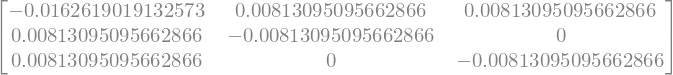

In [75]:
subs = p.GetSubs(0,params["fp"])
sm_lin = sm.linearise(p)
sm_mini = sm_lin.msubs(subs)
sm_mini.f.jacobian(p.q)

In [76]:
import scipy
(K,M) = sm_mini.gen_eigen_problem(p)
K = np.array(K).astype(np.float64)
M = np.array(M).astype(np.float64)
val,vec = scipy.linalg.eig(K,M)

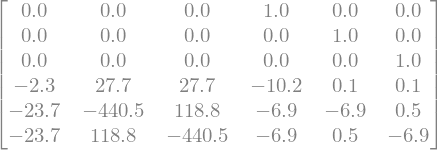

In [77]:
sym.Matrix(np.round(np.linalg.inv(M)@K,1))

In [78]:
pd.DataFrame(ma.extract_eigen_value_data(val,vec))

,Real,Imag,Frequency,Damping,Stable,Eigen Vector,Mode
0,-2.642615,17.820377,2.867216,-0.146688,True,[(-0.0011529356008254813+0.006067975658512244j...,0
1,-0.591053,0.000000,0.000000,NaN,True,"[(-0.8576070007641254+0j), (0.0529693633848729...",1
2,-10.669791,0.000000,0.000000,NaN,True,"[(-0.09166391150264333+0j), (-0.01235228714677...",2
3,-3.708282,23.356776,3.763906,-0.156803,True,[(-6.817358330249252e-19-3.589607055837104e-18...,3


In [79]:
np.rad2deg(RollRig.Calc_coast(ma.NumericModel.from_SymbolicModel(p,sm_lin),p,[0]*6))

array([ 0.        ,  0.        , -9.16007032,  0.        ,  9.16006948,
        0.        ])

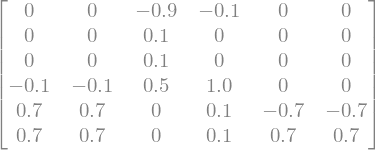

In [80]:
sym.Matrix(np.round(vec,1))

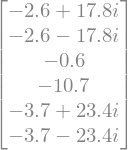

In [81]:
sym.Matrix(np.round(val,1))